# Support vector machine

Support vector machines (SVMs) is a supervised learning methods used for classification. More formally, a support vector machine constructs a separating hyperplane in a high- or infinite-dimensional space, which can be used for classification tasks. Intuitively, a good separation is achieved by the hyperplane that has the largest distance to the nearest training-data point of any class (so-called functional margin), since in general the larger the margin the lower the generalization error of the classifier.

Whereas the original problem may be stated in a finite dimensional space, it often happens that the sets to discriminate are not linearly separable in that space. For this reason, it was proposed that the original finite-dimensional space be mapped into a much higher-dimensional space, presumably making the separation easier in that space, using kernel function instead of usual dot product.

The advantages of support vector machines are:
* Effective in high dimensional spaces.
* Uses a subset of training points in the decision function (called support vectors).
* Different kernel functions can be specified for the decision function.

The disadvantages of support vector machines include:
 * If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.
 * Using of custom kernels is rather expensive (kernel trick).

### Primal formulaton
Computing the SVM classifier amounts to minimizing an expression of the form
$$
    \arg\min_w \frac{1}{\mathcal{l}}
    \sum_{i=1}^{\mathcal{l}} \max(0, 1 − y_{i}(\langle wx_{i} \rangle − b )) + \frac{1}{2C}||w||^2 
$$
Traditional gradient descent methods can be adapted, where instead of taking a step in the direction of the functions gradient, a step is taken in the direction of a vector selected from the function's sub-gradient. This approach has the advantage that, for certain implementations, the number of iterations does not scale with the number of data points.

Minimizing above can be rewritten as a constrained optimization problem with a differentiable objective function in the following way.

$$
    \arg\min_w \frac{1}{\mathcal{l}}
    \sum_{i=1}^{\mathcal{l}} \xi_{i} + \frac{1}{2C}||w||^2 
$$

$$
    y_i(wx_i + b) \geq 1 - \xi_i, ~~~ \xi_i \geq 0
$$


This is called the primal problem.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

%matplotlib inline

Generate set of red and blue points.

In [2]:
mu_one = np.array([-1, -1])
mu_two = np.array([1, 1])

POINT_N = 100

V = np.array([[1., 0.],[0., 1.]])

X_one = np.random.multivariate_normal(mu_one, V, POINT_N)
X_two = np.random.multivariate_normal(mu_two, V, POINT_N)

y_one = np.zeros(POINT_N)
y_two = np.ones(POINT_N)

X = np.vstack([X_one, X_two])
y = np.hstack([y_one, y_two])

In [3]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 0.5, x.max() + 0.5
    y_min, y_max = y.min() - 0.5, y.max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

Train several SVM models with different $C$. And draw separating lines and line for margin equals 1.

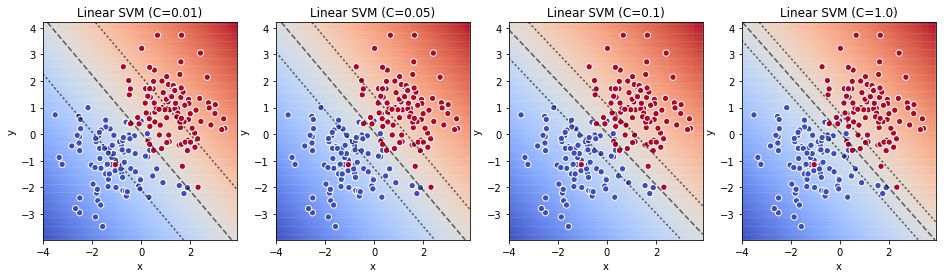

In [4]:
C_values = [0.01, 0.05, 0.1, 1.0]

line_x1 = [-3, +3]

plt.figure(figsize=(16, 4))
for n, C in enumerate(C_values, 1):
    plt.subplot(1, len(C_values), n)

    plt.title(f'Linear SVM (C={C})')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()

    clf = svm.SVC(kernel='linear', C=C)
    clf.fit(X, y)
    
    xx, yy = make_meshgrid(X[:, 0], X[:, 1])
    z = clf.decision_function(np.vstack([xx.ravel(), yy.ravel()]).T)
    z = z.reshape(xx.shape)
    
    plt.pcolormesh(xx, yy, z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.contour(xx, yy, z, levels=[-1, 0, +1], colors=['black'], linestyles=[':', '--', ':'], alpha=0.6)

    plt.scatter(X[:, 0], X[:, 1], s=40, c=y, cmap=plt.cm.coolwarm, edgecolors='white')

### Dual formulation and kernel trick

By solving for the Lagrangian dual of the above problem, one obtains the simplified problem.

$$
\arg\min_{\lambda} \frac{1}{\mathcal{l}}
\sum_{i=1}^{\mathcal{l}} \lambda_{i} +
\frac{1}{2} \sum_{i=1}^{\mathcal{l}} \sum_{j=1}^{\mathcal{l}} \lambda_i \lambda_j y_i y_j \langle x_i, x_j \rangle
$$

$$
0 \leq \lambda_i \leq C, ~~~~ \sum_{j=1}^{\mathcal{l}} y_i \lambda_i = 0
$$

This is called the dual problem.  Coordinate descent algorithms for the dual problem is suitable. Suppose now that we would like to learn a nonlinear classification rule which corresponds to a linear classification rule for the transformed data points $\phi(x_i)$ .Moreover, we are given a kernel function $k$ which satisfies $k(x_i, x_j) = \phi(x_i) \cdot \phi(x_j)$. Then instead of dot product we can use a kernel function, which is which is scalar product in some higher dimension space.


Possible kernels:
* linear $k(x_i, x_j) = \langle x_i, x_j \rangle$
* Gaussian radial basis function $k(x_i, x_j) = \exp(-\gamma||x_i - x_j||^2), \gamma > 0$
* Polynomial (inhomogeneous) $k(x_i, x_j) = \big(\gamma\langle x_i, x_j \rangle + 1 \big)^d, \gamma > 0$

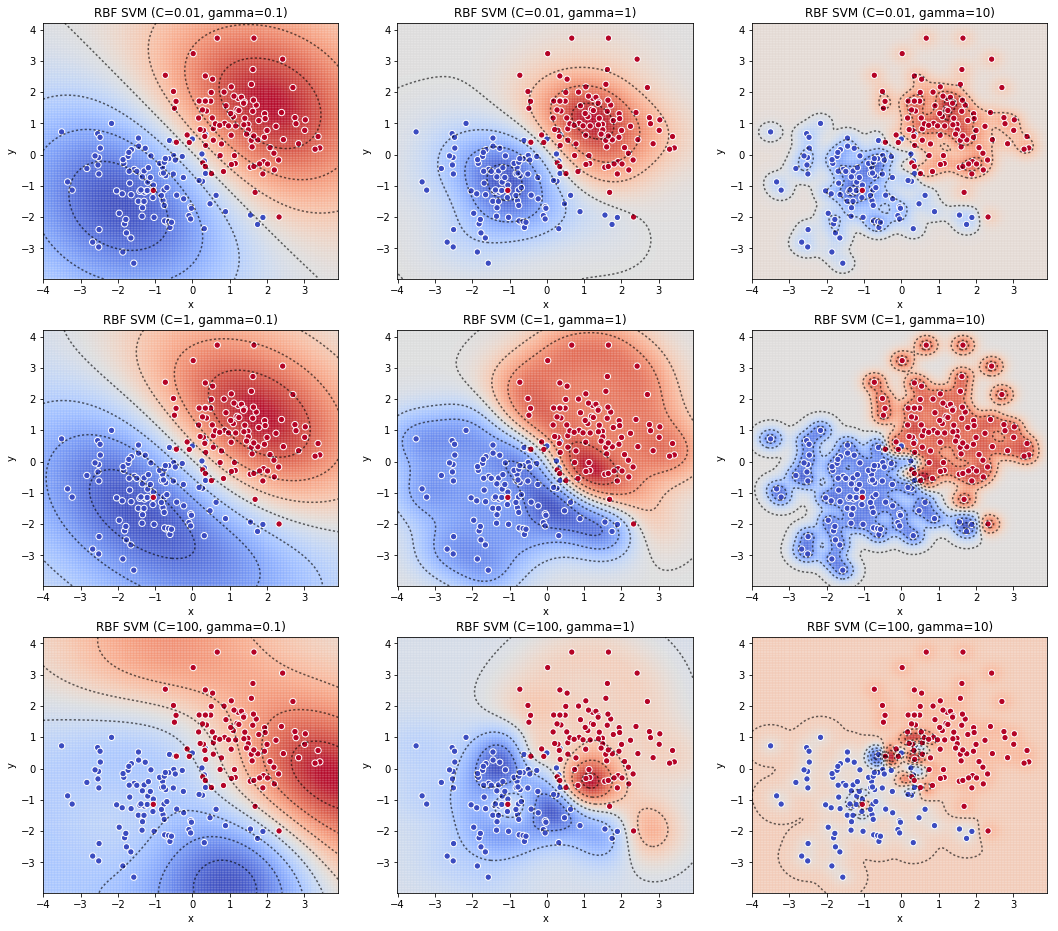

In [5]:
C_values = [0.01, 1, 100]
gamma_values = [0.1, 1, 10]

W, H = len(gamma_values), len(C_values), 

plt.figure(figsize=(18, 16))

for i, C in enumerate(C_values):
    for j, gamma in enumerate(gamma_values):
        clf = svm.SVC(C=C, gamma=gamma)
        clf.fit(X, y)

        xx, yy = make_meshgrid(X[:, 0], X[:, 1])
        z = clf.decision_function(np.vstack([xx.ravel(), yy.ravel()]).T)
        z = z.reshape(xx.shape)

        plt.subplot(H, W, i*W + j + 1)

        plt.title(f'RBF SVM (C={C}, gamma={gamma})')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.grid()
        
        plt.pcolormesh(xx, yy, z, alpha=0.3, cmap=plt.cm.coolwarm)
        plt.contour(xx, yy, z, colors=['black'], linestyles=[':'], alpha=0.6)
    
        plt.scatter(X[:, 0], X[:, 1], s=40, c=y, cmap=plt.cm.coolwarm, edgecolors='white')

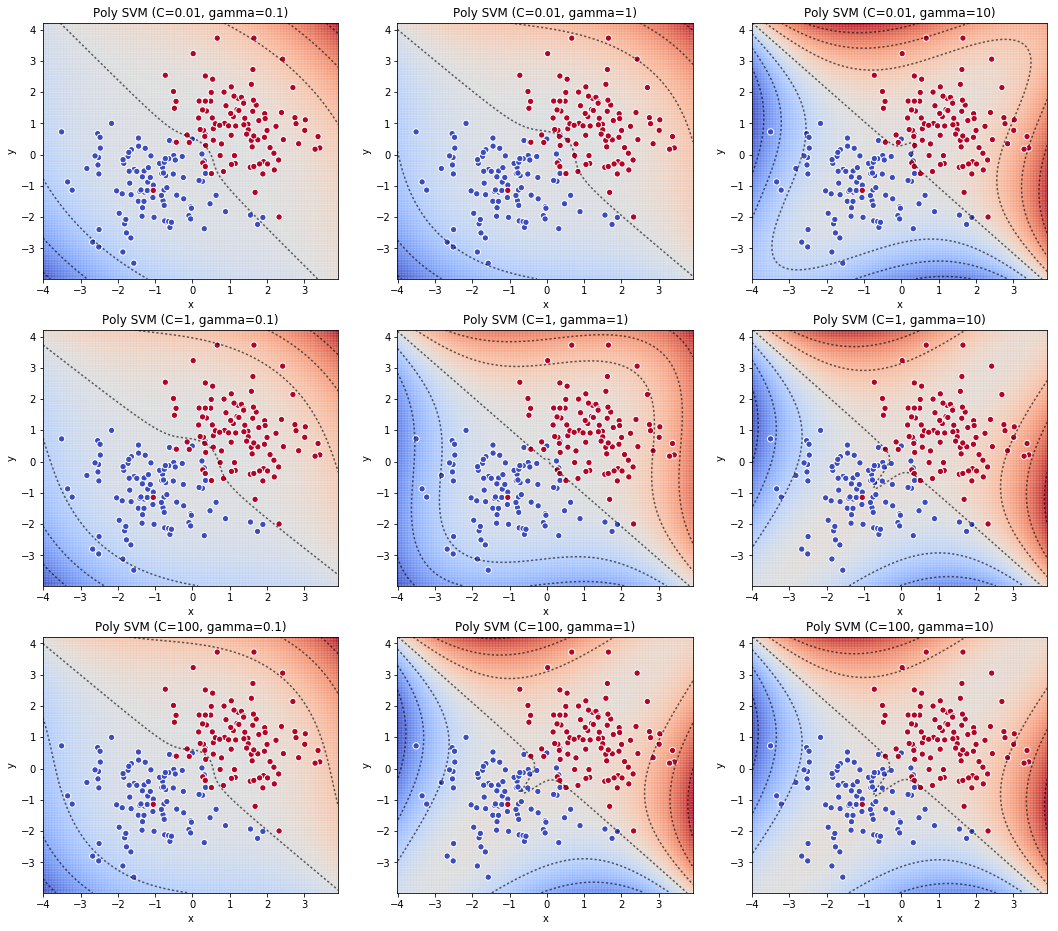

In [6]:
C_values = [0.01, 1, 100]
gamma_values = [0.1, 1, 10]

W, H = len(gamma_values), len(C_values), 

plt.figure(figsize=(18, 16))

for i, C in enumerate(C_values):
    for j, gamma in enumerate(gamma_values):
        clf = svm.SVC(C=C, kernel='poly', gamma=gamma, degree=3)
        clf.fit(X, y)

        xx, yy = make_meshgrid(X[:, 0], X[:, 1])
        z = clf.decision_function(np.vstack([xx.ravel(), yy.ravel()]).T)
        z = z.reshape(xx.shape)

        plt.subplot(H, W, i*W + j + 1)

        plt.title(f'Poly SVM (C={C}, gamma={gamma})')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.grid()
        
        plt.pcolormesh(xx, yy, z, alpha=0.3, cmap=plt.cm.coolwarm)
        plt.contour(xx, yy, z, colors=['black'], linestyles=[':'], alpha=0.6)
    
        plt.scatter(X[:, 0], X[:, 1], s=40, c=y, cmap=plt.cm.coolwarm, edgecolors='white')